<a href="https://colab.research.google.com/github/youngyoung-0/colab-notebook/blob/main/python_ML_study/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression
- data : 성별 소득 data에 따라 특정 구매자의 구매할지 여부를 예측


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score, precision_score,\
                            recall_score, roc_curve, roc_auc_score
import seaborn as sns

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
dataset['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


In [ ]:
x = dataset.iloc[:, [2,3]].values.astype('float32')
y = dataset.iloc[:, 4].values.astype('float32')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [ ]:
# feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train.shape

(320, 2)

In [ ]:
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)


LogisticRegression()

In [ ]:
# predict
y_pred = lr_classifier.predict(x_test)

print("Test set의 실제 true 갯수 = ", sum(y_test))
print("모델이 예측한 true 갯수 = ", sum(y_pred))
print("accuracy = {:.2f}".format(accuracy_score(y_test, y_pred))) # 정확도 (전체 중 얼마나 맞췄나)
print("precision = {:.2f}".format(precision_score(y_test, y_pred))) # 정밀도 (모델이 '참'이라고 한것 중 정답 비율)
print("recall = {:.2f}".format(recall_score(y_test, y_pred))) # 재현율 (실제 '참'인것중 얼마나 찾아냈는가)

Test set의 실제 true 갯수 =  22.0
모델이 예측한 true 갯수 =  18.0
accuracy = 0.93
precision = 0.94
recall = 0.77


In [ ]:
y_pred_proba = lr_classifier.predict_proba(x_test) # 각 클래스에 속할 확률

y_pred_proba_1 = y_pred_proba[:,1]
sum(y_pred_proba_1 > 0.5)

np.int64(18)

In [ ]:
threshold = 0.4
y_pred_1 = y_pred_proba_1 > threshold
print("threshold가 {}일 때 1 로 분류된 갯수: ".format(threshold), sum(y_pred_1))
print("precision = {:.2f}".format(precision_score(y_test, y_pred_1)))
print("recall = {:.2f}".format(recall_score(y_test, y_pred_1)))
print("f1 score = ", f1_score(y_test, y_pred_1))
print()

threshold = 0.6
y_pred_2 = y_pred_proba_1 > threshold
print("threshold가 {}일 때 1 로 분류된 갯수: ".format(threshold), sum(y_pred_2))
print("precision = {:.2f}".format(precision_score(y_test, y_pred_2)))
print("recall = {:.2f}".format(recall_score(y_test, y_pred_2)))
print("f1 score = ", f1_score(y_test, y_pred_2))


threshold가 0.4일 때 1 로 분류된 갯수:  23
precision = 0.83
recall = 0.86
f1 score =  0.8444444444444444

threshold가 0.6일 때 1 로 분류된 갯수:  16
precision = 1.00
recall = 0.73
f1 score =  0.8421052631578947


confution matrix
 [[17  5]
 [ 1 57]]


Text(0.5, 1.0, 'Confusion Matirx\nGround Truth')

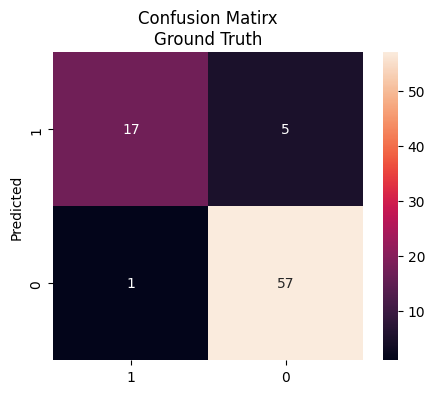

In [ ]:
# confusion matrix를 이용한 model 평가
# 모델이 무엇을 무엇으로 착가했는지 확인하는 작업"
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print("confution matrix\n", cm)

plt.figure(figsize=(5,4))

ax = sns.heatmap(cm, annot = True, fmt = 'd', xticklabels=[1,0], yticklabels=[1,0])
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matirx\nGround Truth')

In [ ]:
# Visualization
y_probas = lr_classifier.predict_proba(x_test)
y_scores = y_probas[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores) # 임계값(threshold)을 바꿀 때 모델이 얼마나 유연하게 대처하는가"
auc = roc_auc_score(y_test, y_scores) # ROC 커브 아래의 면적 / 그래프가 왼쪽 위 모서리에 바짝붙을수록 성능이 좋다.
# Accuracy대신해서 auc를 쓰는 이유
# 데이터가 불균형할 때 모델이 진짜 실력(0과 1을 변별하는 능력)이 있는지를 판단하기 위해 AUC를 사용한다.


Text(0.5, 1.0, 'ROC Curve')

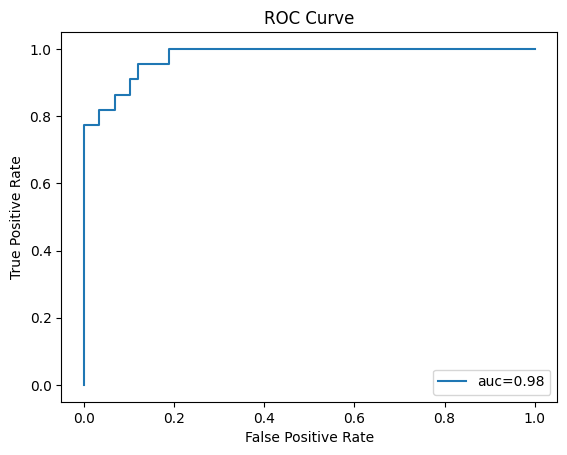

In [ ]:
plt.plot(fpr, tpr, label="auc="+ "{:.2f}".format(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')